# Intro

* Bayesian: Probability $\rightarrow$ degree of believes.
* Frequentist: Long-run frequency of an events.

Frequentist point of view is not useful for president election outcome.

* Prior probability (belief) : $P(A)$

* Keynes:

"When the facts change, I change my mind. What do you do, Sir?"

* Updated belief / posterior probability: $P(A|X)$

Example:
1. $P(A)$: The coin has a 50% chance of being heads. $P(A|X)$: You look at the coin, observe it is heads, denote this information $X$, and assign probability 1.0 to heads and 0.0 to tails.

2. $P(A)$: This big, complex code likely has a bug in it. $P(A|X)$: the code passed all $X$ tests; there still might be a bug.

3. $P(A)$: The patient could have any number of diseases. $P(A|X)$: Performing a blood test generated evidence $X$, ruling out some of the possible disease from consideration.


Not completely discard the prior beliefs, but **re-weighted the prior**

Posterior Probability:

$$P(A|X) = \frac{P(X|A) P(A)}{P(X)}$$

$$P(A|X) \sim P(X|A) P(A)$$

Bayesian inference merely uses it to connect the prior probability $P(A)$ with an updated posterior probability $P(A|X)$

## Libarian or Farmer??

$A$ : Steve as a librarian

$P(A) = \frac{1}{21} \rightarrow$ Prior

$X$ : His personality

$$P(A|X) = \frac{P(X|A) P(A)}{P(X)}$$

$P(X|A)$: How likely the neighbor would be to describe Steve in this way if he is librarian (0.95) 

$P(X)$: the chance of someone (anyone) being described in the way the neighbor described Steve. (difficult to get), but:

$$P(X) = P(X \text{ and }A) + P(X \text{ and } \sim A)$$

We know $P(X|A)$ and $P(A)$, and $P(\sim A) = 1 - P(A) = 20 / 21$

$P(X| \sim A)$: Probability of a neighbor describing Steve as $X$, given he's a farmer (0.5).

$P(X) = 0.95 \times \frac{1}{21} + 0.5 \times \frac{20}{21} = 0.52$

$$P(A|X) = \frac{0.951/21}{0.52} = 0.087$$

Not very high but considering how many farmers than a librarian.

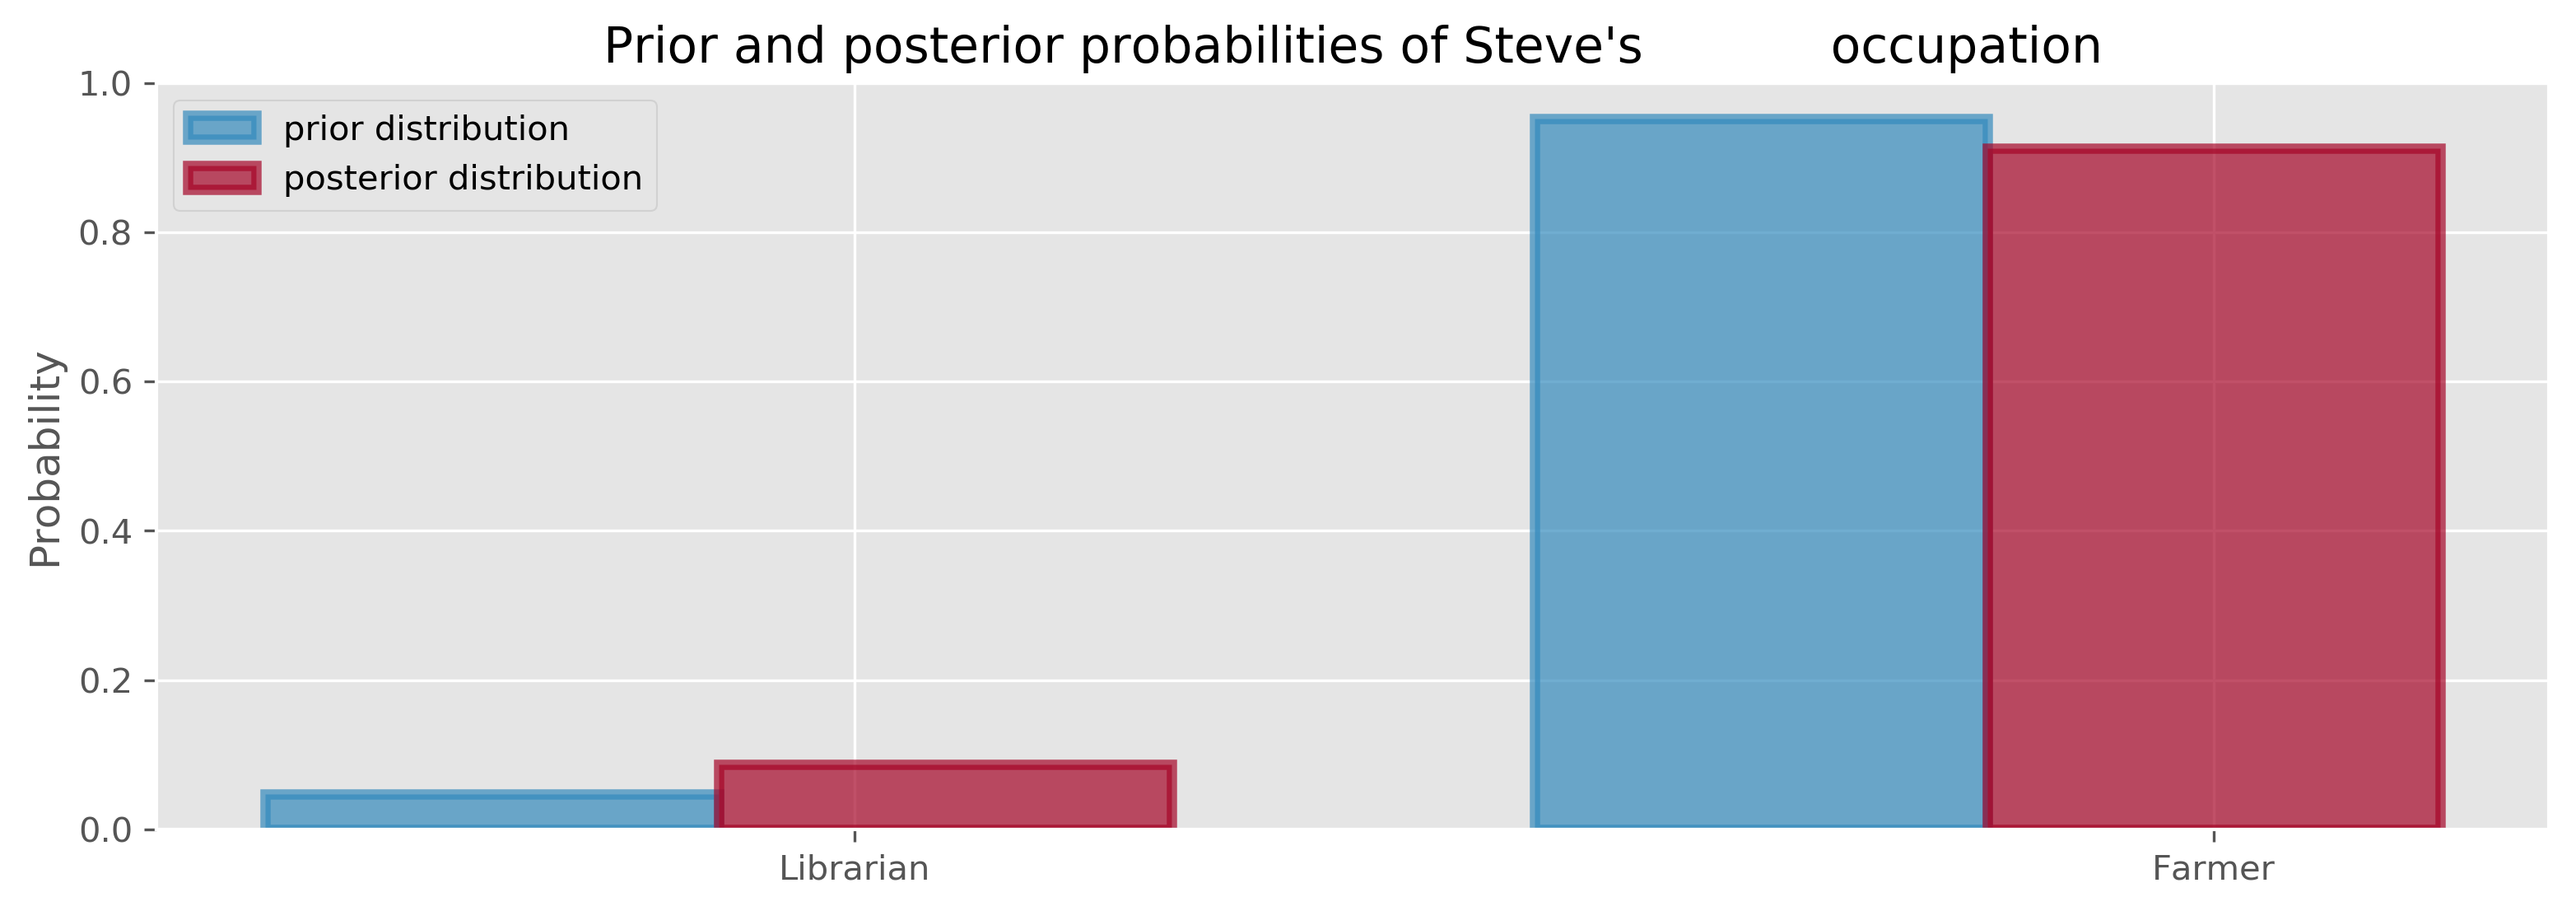

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

colors = ['#348ABD', '#A60628']
prior = [1/21., 20/21.]
posterior = [0.087, 1 - 0.087]
plt.bar([0, .7], prior, alpha = 0.70, width = 0.25,
       color=colors[0], label='prior distribution',
       lw='3', edgecolor="#348ABD");

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
       width=0.25, color=colors[1], label='posterior distribution',
       lw='3', edgecolor='#A60628');

plt.xticks([0.20, 0.95], ["Librarian", "Farmer"]);
plt.title("Prior and posterior probabilities of Steve's\
            occupation");
plt.ylabel('Probability');
plt.legend(loc='upper left');

## Probability Distribution

$Z$ is a random variables.

* Discrete
* Continuous
* Mixed

### Discrete

* Probability mass functions

* Poisson's Distribution:
$$P(Z=k) = \frac{\lambda^{k}e^{-\lambda}}{k!},
k = 0,1,2,\cdots
$$

* $\lambda$: intensity of the Poisson Distribution

Random variable $Z$ has a Poisson mass distribution, we denote this by writing:

$$Z \sim \text{Poi}(\lambda)$$

Expected value:
$$E[Z|\lambda] = \lambda$$

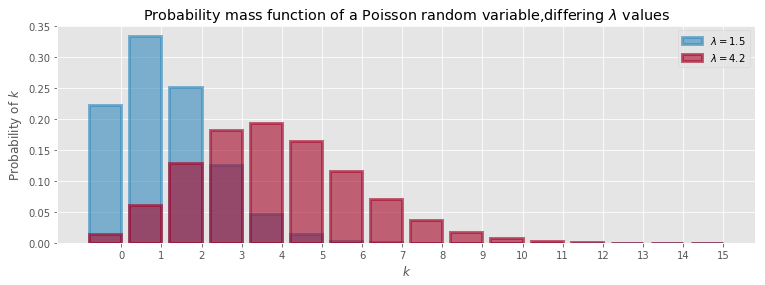

In [2]:
figsize(12.5, 4)
plt.style.use('ggplot');

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colors = ['#348ABD', '#A60628']

plt.bar(a, poi.pmf(a, lambda_[0]), color=colors[0],
       label='$\lambda = %.1f$' % lambda_[0], alpha=0.60,
       edgecolor=colors[0], lw="3");

plt.bar(a, poi.pmf(a, lambda_[1]), color=colors[1],
       label='$\lambda = %.1f$' % lambda_[1], alpha=0.60,
       edgecolor=colors[1], lw='3');

plt.xticks(a + 0.4, a);
plt.legend();
plt.ylabel('Probability of $k$');
plt.xlabel('$k$');
plt.title('Probability mass function of a Poisson random variable,\
differing $\lambda$ values');

### Continuous Case

* Probability Density Function
* Exponential density:
$$f_{Z}(z|\lambda)=\lambda e^{-\lambda z}, z \geq 0$$

$$Z \sim \text{ Exp}(\lambda)$$

Expected value:

$$E[Z|\lambda] = \frac{1}{\lambda}$$

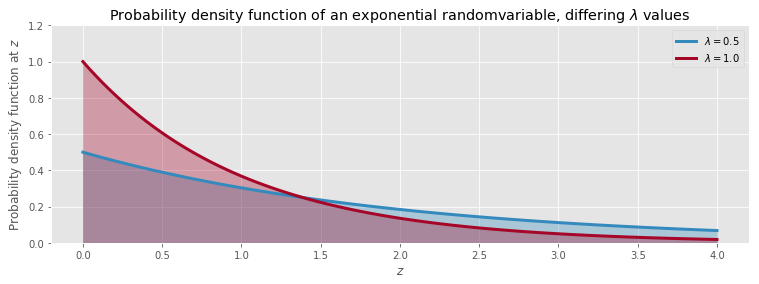

In [5]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colors):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
            color=c, label='$\lambda = %.1f$' %l);
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33);

plt.legend();
plt.ylabel('Probability density function at $z$');
plt.xlabel('$z$');
plt.ylim(0,1.2);
plt.title('Probability density function of an exponential random\
variable, differing $\lambda$ values');

### What is $\lambda$?

* In the real world we only see $Z$.
* Bayesian Inference try to guess beliefs about $\lambda$.